<a href="https://colab.research.google.com/github/neerajkumarvaid/ML_DL_RL_Codes/blob/master/Machine_Learning/Murphy/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Load the concrete strength data as a Pandas dataframe.



In [2]:
import pandas as pd
con = pd.read_csv('ConcreteStrength_Data.csv')
con

,No,Cement,Slag,Fly Ash,Water,Superplasticizer (SP),Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength(Mpa)
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...,...
1025,1026,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,1027,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,1028,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,1029,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Remove the "No" column.

In [26]:
con = con.drop(columns='No')

Rename the columns to have shorter names.

In [27]:
list(con.columns)

['Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'FineAgg',
 'Age',
 'Strength']

In [28]:
con.rename(columns={'Fly Ash': 'FlyAsh', 'Coarse Aggregate ': "CoarseAgg",
                    'Fine Aggregate': 'FineAgg', 'Superplasticizer (SP)': 'SP',
                    'Age (day)': 'Age',
                    'Concrete compressive strength(Mpa)': 'Strength'}, inplace=True)
con.head()

,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let us scatterplot the flyash and strenght variables to visualize if there is a correlation between these two variables.

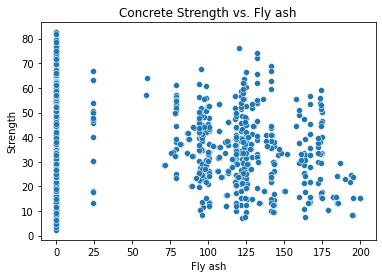

In [29]:
import seaborn as sns
ax = sns.scatterplot(x="FlyAsh", y="Strength", data=con)
ax.set_title("Concrete Strength vs. Fly ash")
ax.set_xlabel("Fly ash");

**Correlation Coefficient**
A correlation coefficient (typically denoted r) is a single number that describes the extent of the linear relationship between two variables. 

- Correlation value of r = +1 indicates perfect linearity (the two variables move together, like “height in inches” and “height in centimeters”). 

- Correlation value of r = 0 indicates no correlation 
- Correlation value of r = -1 indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other).

The most common measure to quantify correlation is the Pearson correlation coefficient. The Scipy library provides a method called pearsonr() (Pearson’s r).

In [30]:
from scipy import stats
stats.pearsonr(con['Strength'], con['FlyAsh'])

(-0.10575491629731355, 0.000675158355575339)

Two values returned by pearsonr() method are:

- Pearson’s correlation coefficient r  = -0.1057, indicates that "strength" and "Flyash" are inversly correlated

- A p-value. This is the probability that the true value of r is zero (no correlation).

We conclude based on this that there is weak inverse linear relationship between concrete strength and fly ash but not so weak that we should conclude the variables are uncorrelated. In other words, it seems that fly ash does have some influence on concrete strength.

**Correlation Matrix**

A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables. The Pandas data frame has this functionality built-in to its corr() method, which I have wrapped inside the round() method to keep things tidy. Notice that every correlation matrix is symmetrical: the correlation of “Cement” with “Slag” is the same as the correlation of “Slag” with “Cement” (-0.28). Thus, the top (or bottom, depending on your preferences) of every correlation matrix is redundant. The correlation between each variable and itself is 1.0, hence the diagonal.

In [31]:
cormat = con.corr()
round(cormat,2)

,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
FlyAsh,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
SP,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
CoarseAgg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
FineAgg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
Strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


**Correlation Heatmap**

Correlation matric can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid). 

The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have lower values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. 

For example, if I focus on the “Strength” column, I immediately see that “Cement” and "Age" have the largest positive correlations whereas "Water" has the large negative correlation.

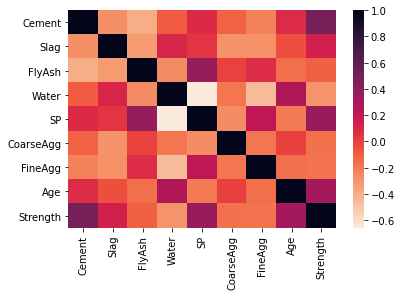

In [33]:
sns.heatmap(cormat, cmap = sns.cm.rocket_r);

Correlation $\neq$ Independence

Let us assume that X ~ U(0,1) and Y = X$^{2}$.

Clearly, Y is dependent on X but let us compute the correlation between X and Y.


In [50]:
from scipy.stats import uniform
import numpy as np

x = np.linspace(-1,1,10)
N = 1000 # draw 100 points from uniform distribution

y = [a*a for a in x] # compute y = x^2 for every value of x


In [51]:
stats.pearsonr(x, y)

(-1.0027643639803414e-16, 0.9999999999999991)

Notice that the pearson coefficient is 0 with probabilit 1. Let us see a few more examples of such behaviour.

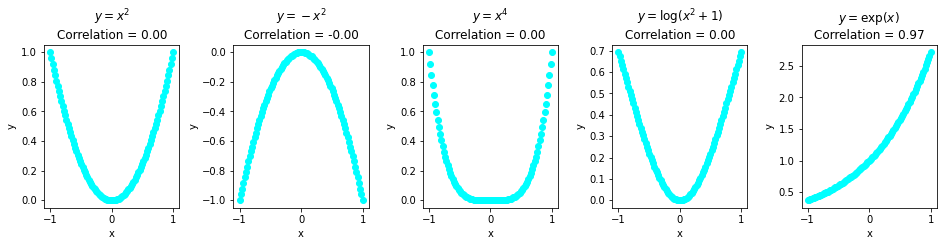

In [54]:
import matplotlib.pyplot as plt

# Create a data matrix
x = np.linspace(-1,1,100) # sample 100 points within -1 to 1 from a uniform distribution

x = np.vstack((x, x*x)) # y = x*x
x = np.vstack((x, -x[0,]**2)) # y = -x*x
x = np.vstack((x, x[0,]**4)) # y = x**4
x = np.vstack((x, np.log(x[0,]**2+1))) # y = log(x^2+1)
x = np.vstack((x, np.exp(x[0,]))) # y = exp(x)

# Compute the correlation
rho_nonlinear = np.corrcoef(x)

# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
    ax[i].scatter(x[0,],x[1+i,],color='cyan')
    ax[i].title.set_text(title[i] + '\n' + 
                         'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()